In [1]:
from models.models import GerstnerWaves
from models.simulation import DataGeneration

from utils.plots import GerstnerWavesPlots

from config import configuration

import numpy as np

import pandas as pd

In [2]:
data_config_name = 'len200_r1'
data_config = configuration.get_data_config_from_json(configuration.get_json_from_path(configuration.DATA_CONFIG_JSON_PATH), data_config_name)

plot_path = 'data/gerstner/plots'
model = GerstnerWaves()
plot = GerstnerWavesPlots(plot_path, result_path="")
datagen = DataGeneration(data_config.save_info.path, data_config.save_info.name, model)

[train, val, test] = datagen.load_data()

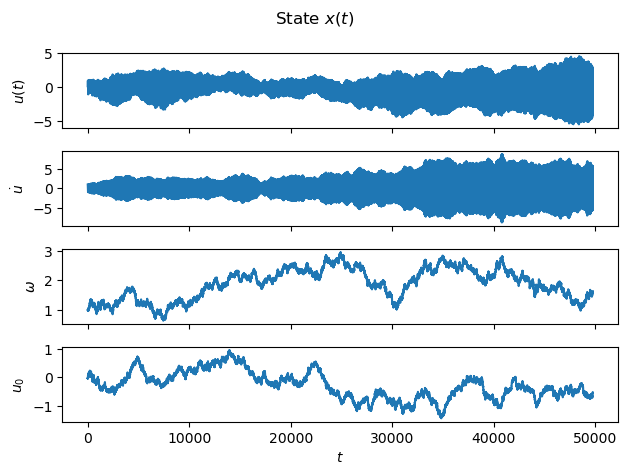

tensor(19.9000, dtype=torch.float64)

In [13]:
from utils.plots import plot_states_complete
plot_states_complete(1, train[1][:, 1:, :])
train[0][-1]

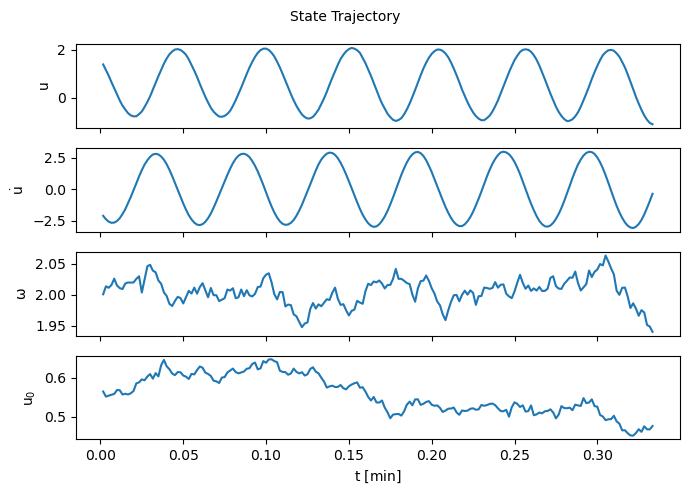

In [14]:
#gwp.plot_observations_default(test[0], test[2][batch_nr, :, :])
plot.plot_state_trajectory(train[1][75, :, :])

In [5]:
result_path = 'data/gerstner/results.csv'
results = pd.read_csv(result_path)
a = results['loss_in_dB']


def get_min_loss_per_estimator_type(result_path: str, process_variance: float, measurement_variance: float, **kwargs)-> pd.DataFrame:
    results = pd.read_csv(result_path)
    results_header = list(results.columns.values)
    filter_dict = {'process_variance':process_variance, 'measurement_variance': measurement_variance}

    for column_name, value in kwargs.items():
        if column_name in results_header:
            filter_dict[column_name] = value

    for column_name, value in filter_dict.items():
        results = results[np.isclose(results[column_name], value)]

    results = results.groupby('estimator_name').agg(['min'])

    return results

a = get_min_loss_per_estimator_type(result_path, 0.0001, 1, n_features=1)

In [6]:
result_path = 'data/gerstner/results.csv'
results = pd.read_csv(result_path)
a = results['loss_in_dB']


def get_min_loss_per_estimator_type(result_path: str, process_variance: float, measurement_variance: float, **kwargs)-> pd.DataFrame:
    results = pd.read_csv(result_path)
    results_header = list(results.columns.values)
    filter_dict = {'process_variance':process_variance, 'measurement_variance': measurement_variance}

    for column_name, value in kwargs.items():
        if column_name in results_header:
            filter_dict[column_name] = value

    for column_name, value in filter_dict.items():
        results = results[np.isclose(results[column_name], value)]

    results = results.groupby('estimator_name').agg(['min'])

    return results

a = get_min_loss_per_estimator_type(result_path, 0.0001, 1, n_features=1)

In [7]:
result_path = 'data/gerstner/results.csv'
results = pd.read_csv(result_path)
a = results['loss_in_dB']


def get_min_loss_per_estimator_type(result_path: str, process_variance: float, measurement_variance: float, **kwargs)-> pd.DataFrame:
    results = pd.read_csv(result_path)
    results_header = list(results.columns.values)
    filter_dict = {'process_variance':process_variance, 'measurement_variance': measurement_variance}

    for column_name, value in kwargs.items():
        if column_name in results_header:
            filter_dict[column_name] = value

    for column_name, value in filter_dict.items():
        results = results[np.isclose(results[column_name], value)]

    results = results.groupby('estimator_name').agg(['min'])

    return results

a = get_min_loss_per_estimator_type(result_path, 0.0001, 1, n_features=1)